# Data Visualization P2

In [10]:
import pandas as pd
import numpy as np

import datetime
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import folium
from folium.plugins import MarkerCluster, HeatMap
import pandas as pd

#import sqlite3


pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [11]:
df_accidents = pd.read_csv("accident_cleaned_data.csv")
df = pd.DataFrame(df_accidents)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_24036\522112658.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day_of_Week', y='Number_of_Casualties', data=df_grouped, palette='viridis')


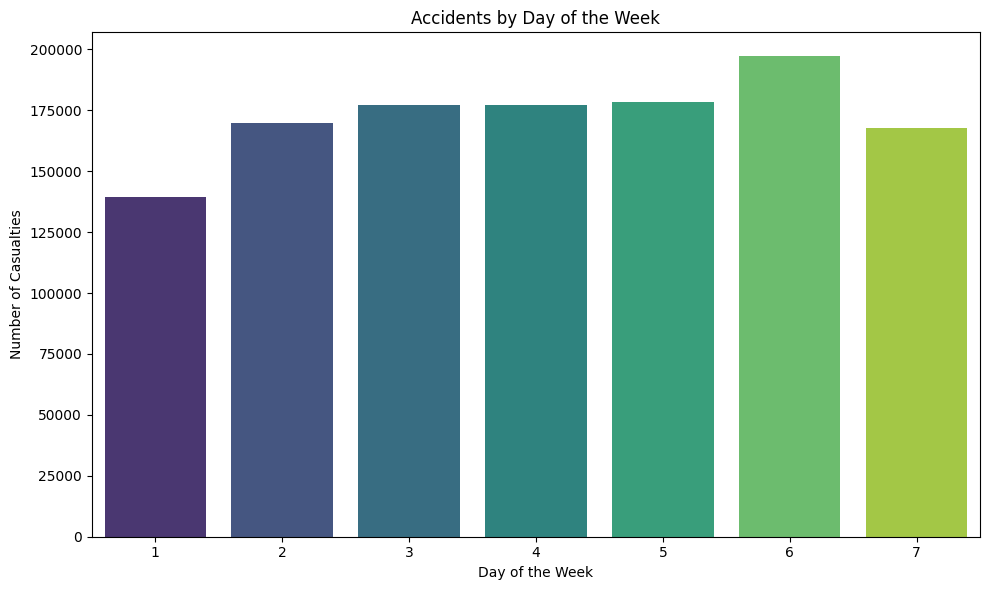

In [3]:
# Grouping the data by 'Day_of_Week' and summing the 'Number_of_Casualties'
df_grouped = df.groupby('Day_of_Week')['Number_of_Casualties'].sum().reset_index()

# Create a simple bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Day_of_Week', y='Number_of_Casualties', data=df_grouped, palette='viridis')

# Adding titles and labels
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Casualties')

# Show the plot
plt.tight_layout()
plt.show()

In [4]:
df_casu= pd.read_csv("casualties_cleaned_data.csv")

C:\Users\ahmed\AppData\Local\Temp\ipykernel_24036\3280863648.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Casualty_Type', y='Count', data=df_casu_grouped, palette='Blues')


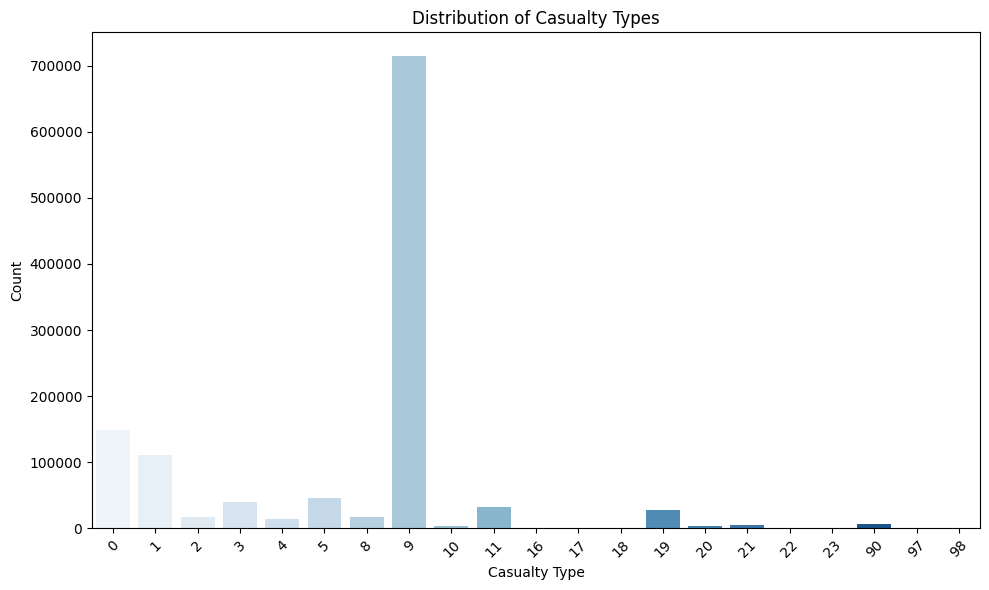

In [5]:
# Grouping the data by 'Casualty_Type' and counting occurrences
df_casu_grouped = df_casu['Casualty_Type'].value_counts().reset_index()
df_casu_grouped.columns = ['Casualty_Type', 'Count']

# Create a simple bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Casualty_Type', y='Count', data=df_casu_grouped, palette='Blues')

# Adding titles and labels
plt.title('Distribution of Casualty Types')
plt.xlabel('Casualty Type')
plt.ylabel('Count')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

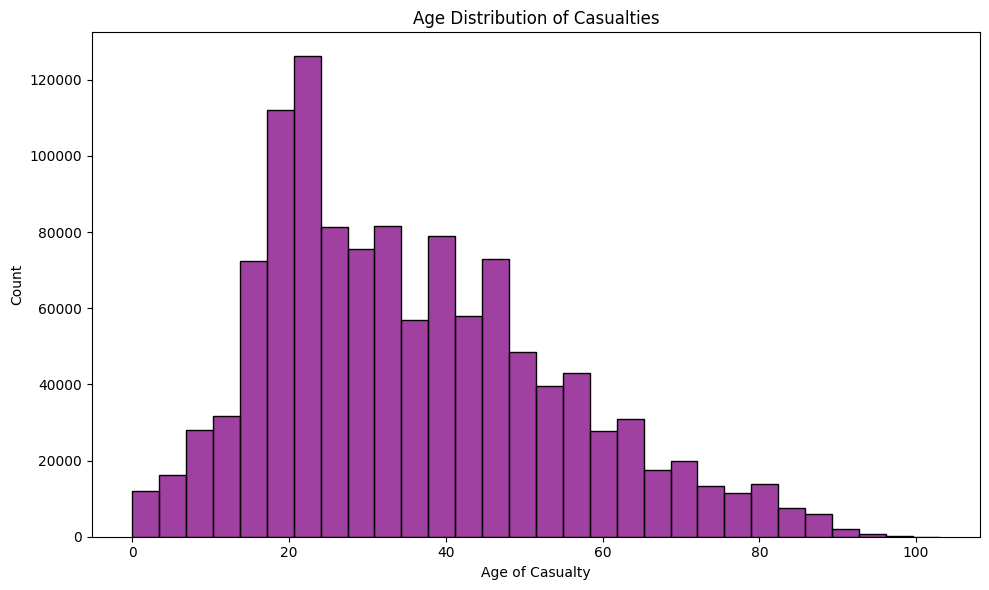

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df_casu['Age_of_Casualty'], bins=30, kde=False, color='purple')

# Adding titles and labels
plt.title('Age Distribution of Casualties')
plt.xlabel('Age of Casualty')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()

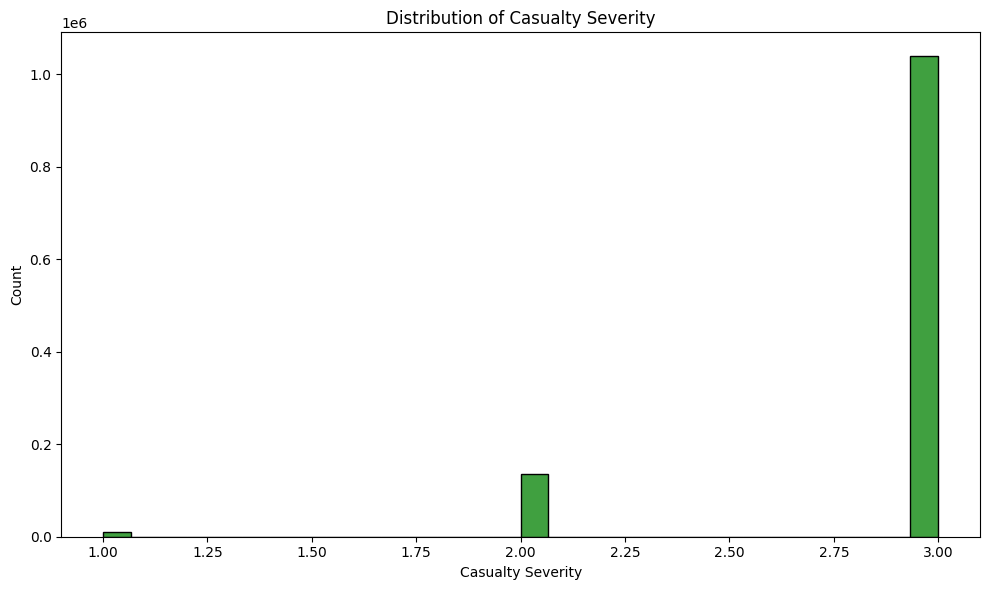

In [7]:
# Create a histogram for Casualty Severity
plt.figure(figsize=(10, 6))
sns.histplot(df_casu['Casualty_Severity'], bins=30, kde=False, color='green')

# Adding titles and labels
plt.title('Distribution of Casualty Severity')
plt.xlabel('Casualty Severity')
plt.ylabel('Count')


# Show the plot
plt.tight_layout()
plt.show()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_24036\3066595840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weather_Conditions', y='Number_of_Casualties', data=df_grouped_weather, palette='coolwarm')


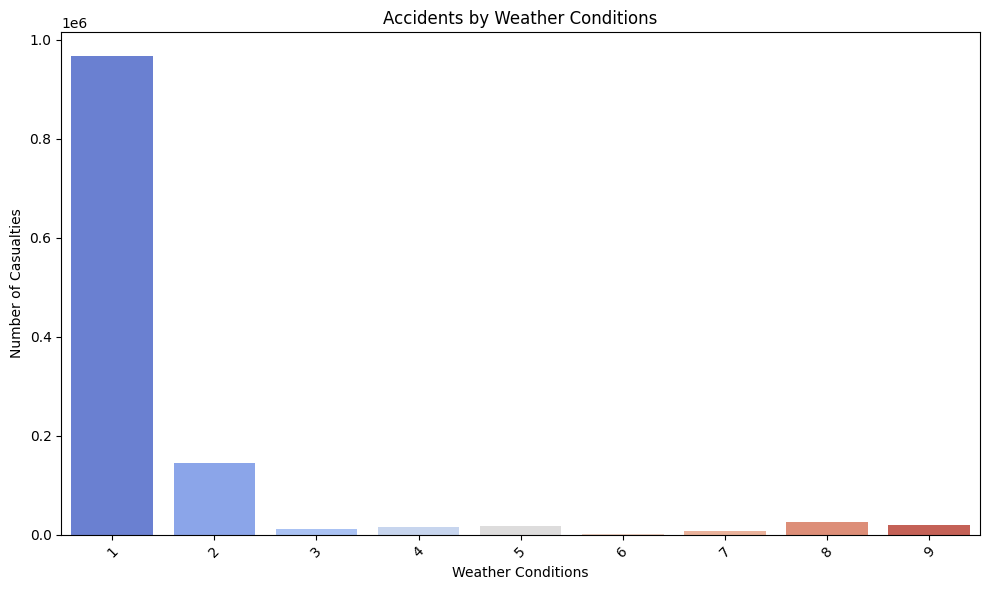

In [8]:
# Grouping the data by 'Weather_Conditions' and summing the 'Number_of_Casualties'
df_grouped_weather = df.groupby('Weather_Conditions')['Number_of_Casualties'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Weather_Conditions', y='Number_of_Casualties', data=df_grouped_weather, palette='coolwarm')

# Adding titles and labels
plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Casualties')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [12]:
# Filter DataFrame based on user input (same as before)
search_input = input("Enter a district name to search: ")
filtered_df = filter_df(search_input)

# Check if there is any data for the selected district
if not filtered_df.empty:
    # Group by 'Local_Authority_(District)', 'Local_Authority_(Highway)', and 'Accident_Severity_Label'
    grouped_data = filtered_df.groupby(
        ['Local_Authority_(District)', 'Local_Authority_(Highway)', 'Accident_Severity_Label']
    )['Number_of_Casualties'].sum().reset_index()

    # Plot the grouped bar plot
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Accident_Severity_Label', y='Number_of_Casualties', hue='Local_Authority_(Highway)', 
                data=grouped_data, palette='RdYlGn')

    # Titles and labels
    plt.title(f'Accidents by Severity in District: {search_input}')
    plt.xlabel('Accident Severity')
    plt.ylabel('Number of Casualties')

    # Show the plot
    plt.tight_layout()
    plt.show()

else:
    print(f"No results found for '{search_input}'. Please try another district name.")

NameError: name 'filter_df' is not defined

## Heatmap of Accident Locations Based on Severity

#### Columns Used:
- Accident Severity
- Location Easting OSGR, Location Northing OSGR
- Number of Vehicles
- Road Type

In [ ]:
Heatmap_df = df_accidents[['Accident_Severity','Number_of_Casualties','Local_Authority_(District)','Local_Authority_(Highway)','Number_of_Vehicles','Longitude','Latitude']]
#Heatmap_df.to_csv('Heatmap.csv', index=False)

In [ ]:
grouped_df = df_accidents.groupby(
    ['Local_Authority_(Highway)', 'Local_Authority_(District)', 'Accident_Severity']
)['Number_of_Casualties'].sum().reset_index()

# Get the unique values of Local_Authority_(Highway) to create separate subplots
highways = grouped_df['Local_Authority_(Highway)'].unique()

# Set up subplots based on the number of unique highways
fig, axes = plt.subplots(nrows=len(highways), figsize=(12, 5 * len(highways)))

# Loop through each highway and create a bar plot for each
for ax, highway in zip(axes, highways):
    # Filter data for the current highway
    highway_data = grouped_df[grouped_df['Local_Authority_(Highway)'] == highway]

    # Create the bar plot for the current highway
    sns.barplot(
        x='Local_Authority_(District)', 
        y='Number_of_Casualties', 
        hue='Accident_Severity', 
        data=highway_data, 
        ax=ax, 
        palette='viridis'
    )

    # Set the title for the subplot
    ax.set_title(f'Accidents by Severity in Highway: {highway}')
    ax.set_xlabel('Local Authority (District)')
    ax.set_ylabel('Number of Casualties')
    ax.legend(title='Severity Level')

    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Group the data by Accident_Severity, Local_Authority_(District), and Local_Authority_(Highway)
grouped_df = Heatmap_df.groupby(['Accident_Severity', 'Local_Authority_(District)', 'Local_Authority_(Highway)']).agg({
    'Number_of_Casualties': 'sum',
    'Number_of_Vehicles': 'sum'
}).reset_index()

# Rename columns for clarity
grouped_df.columns = ['Accident_Severity', 'District', 'Highway', 'Total_Casualties', 'Total_Vehicles']

# Display the grouped data
print(grouped_df)


In [ ]:
# Grouping the data by 'Local_Authority_(District)' and 'Accident_Severity' to sum casualties
grouped_df = df_accidents.groupby(
    ['Local_Authority_(District)', 'Accident_Severity']
)['Number_of_Casualties'].sum().reset_index()

# Create a grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=grouped_df,
    x='Local_Authority_(District)', 
    y='Number_of_Casualties', 
    hue='Accident_Severity', 
    palette='viridis'
)

# Adding titles and labels
plt.title('Accidents by Severity and Local Authority')
plt.xlabel('Local Authority (District)')
plt.ylabel('Number of Casualties')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend with a title
plt.legend(title='Severity Level')

# Adjust layout to make room for x labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Sample DataFrame creation (using the same data structure as in Plotly)
df = px.data.medals_wide(indexed=True)

# Set up the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='Blues', fmt='g', cbar_kws={'label': 'Number of Medals'})

# Adding titles and labels
plt.title('Medals Won by Country')
plt.xlabel('Year')
plt.ylabel('Country')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Sample 100 rows from the cleaned DataFrame
Heatmap_df = Heatmap_df.sample(n=100, random_state=1)

# Sample severity mapping
severity_map = {
    1: 'Fatal',
    2: 'Serious',
    3: 'Slight'
}

# Adding Severity_Label to the DataFrame
Heatmap_df['Severity_Label'] = Heatmap_df['Accident_Severity'].map(severity_map)

# Step 3: Create separate heatmaps for vehicles and casualties for each severity level
for severity in severity_map.values():
    # Filter data for each severity
    severity_data = Heatmap_df[Heatmap_df['Severity_Label'] == severity]
    
    # Create a pivot table for the number of vehicles
    vehicles_heatmap_data = severity_data.pivot_table(
        index='Local_Authority_(District)',
        columns='Local_Authority_(Highway)',
        values='Number_of_Vehicles',
        aggfunc='sum',
        fill_value=0
    )
    
    # Create a pivot table for the number of casualties
    casualties_heatmap_data = severity_data.pivot_table(
        index='Local_Authority_(District)',
        columns='Local_Authority_(Highway)',
        values='Number_of_Casualties',
        aggfunc='sum',
        fill_value=0
    )
    
    # Plotting for Number of Vehicles
    plt.figure(figsize=(15, 12))  # Adjusted figure size for better visualization
    sns.heatmap(vehicles_heatmap_data, 
                cmap='YlGnBu', 
                annot=True, 
                fmt='0.1f', 
                linecolor='black', 
                linewidths=1,
                annot_kws={"size": 20},  # Adjusted annotation font size
                cbar=True)
    plt.title(f'Heatmap of Vehicles Involved in {severity} Accidents', fontsize=24)
    plt.xlabel('Location Easting OSGR', fontsize=20)
    plt.ylabel('Location Northing OSGR', fontsize=20)
    plt.xticks(fontsize=16)  # X-axis tick labels font size
    plt.yticks(fontsize=16)  # Y-axis tick labels font size
    plt.show()  # Display the heatmap

    # Plotting for Number of Casualties
    plt.figure(figsize=(15, 12))  # Keep the size reasonable
    sns.heatmap(casualties_heatmap_data, 
                cmap='YlOrRd', 
                annot=True, 
                fmt='0.1f', 
                linecolor='black', 
                linewidths=1,
                annot_kws={"size": 20},  # Adjusted annotation font size
                cbar=True)
    plt.title(f'Heatmap of Casualties in {severity} Accidents', fontsize=24)
    plt.xlabel('Location Easting OSGR', fontsize=20)
    plt.ylabel('Location Northing OSGR', fontsize=20)
    plt.xticks(fontsize=16)  # X-axis tick labels font size
    plt.yticks(fontsize=16)  # Y-axis tick labels font size
    plt.show()  # Display the heatmap

In [ ]:
# Set the number of bins
num_bins = 15

# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Number_of_Vehicles', bins=num_bins, kde=False, stat='percent', color='blue')

# Adding titles and labels
plt.title('Distribution of Number of Vehicles Involved in Accidents')
plt.xlabel('Number of Vehicles')
plt.ylabel('Percentage of Accidents')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Set the number of bins
num_bins = 15

# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Number_of_Casualties', bins=num_bins, kde=False, stat='percent', color='orange')

# Adding titles and labels
plt.title('Distribution of Number of Casualties')
plt.xlabel('Number of Casualties')
plt.ylabel('Percentage of Accidents')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Count accidents per day
accidents_per_day = df.groupby('Date').size().reset_index(name='Number_of_Accidents')

# Create a static line plot
plt.figure(figsize=(12, 6))
plt.plot(accidents_per_day['Date'], accidents_per_day['Number_of_Accidents'], marker='o', linestyle='-', color='blue')

# Adding titles and labels
plt.title('Number of Accidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a grid for better visibility
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Convert 'Time' to a numeric value if it's in string format
# Assuming 'Time' is in 'HHMM' format (e.g., '1345' for 1:45 PM)
# Convert to datetime to extract hour for easier plotting
df['Time_Hours'] = pd.to_datetime(df['Time'], format='%H%M', errors='coerce').dt.hour

# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Time_Hours', bins=24, stat='percent', color='green')

# Adding titles and labels
plt.title('Accidents by Time of Day')
plt.xlabel('Time (Hours)')
plt.ylabel('Percentage of Accidents')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Create a static box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Speed_limit', y='Number_of_Casualties', palette='Set2')

# Adding titles and labels
plt.title('Number of Casualties by Speed Limit')
plt.xlabel('Speed Limit (mph)')
plt.ylabel('Number of Casualties')

# Show the plot
plt.tight_layout()
plt.show()